In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve all class names from <object> tags
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml",))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels


No class name found in XML: C:/Users/kaush/Downloads/lips/lips/annotation\inflammed\aug_0_9098.xml
Skipping aug_0_9098.jpg due to missing class label.
Number of images: 596
Number of labels: 596


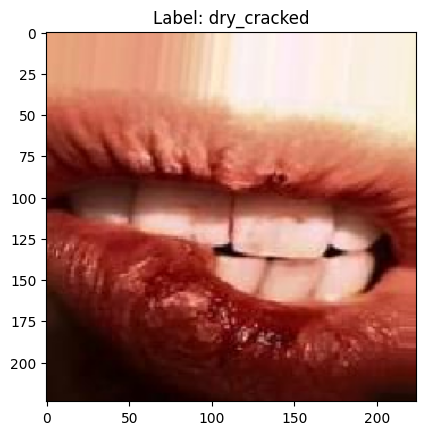

In [3]:
# Preprocess images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        try:
            if not os.path.exists(img_path):
                print(f"Warning: Image path does not exist: {img_path}")
                continue

            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)

            if np.all(img == 0):
                print(f"Warning: Image {img_path} is filled with zeros after conversion.")
                continue
            
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images) / 255.0  # Normalize
    labels = np.array(labels)
    return images, labels

# Define class names
class_names = ["dry_cracked", "inflammed", "pale"]

# Directories for images and annotations
image_dir = "C:/Users/kaush/Downloads/lips/lips/augmented_train"
xml_dir = "C:/Users/kaush/Downloads/lips/lips/annotation"

# Load and preprocess the data
image_paths, labels = load_data(image_dir, xml_dir, class_names)
print(f"Number of images: {len(image_paths)}")
print(f"Number of labels: {len(labels)}")
images, labels = preprocess_images(image_paths, labels)

# Display a sample image
if len(images) > 0:
    plt.imshow(images[0])
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.show()
else:
    print("No images were loaded. Please check the image paths and data.")


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2904 - loss: 1.1276 - val_accuracy: 0.0000e+00 - val_loss: 1.7097
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3710 - loss: 1.1086 - val_accuracy: 0.0000e+00 - val_loss: 1.6051
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3761 - loss: 1.1024 - val_accuracy: 0.0000e+00 - val_loss: 1.5278
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3994 - loss: 1.0794 - val_accuracy: 0.0000e+00 - val_loss: 1.5471
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4077 - loss: 1.0628 - val_accuracy: 0.0000e+00 - val_loss: 1.4975
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3789 - loss: 1.0799 - val_accuracy: 0.0000e+00 - val_loss: 1.5412
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3531 - loss: 1.0748 - val_accuracy: 0.0000e+00 - val_loss: 1.4957
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3935 - loss: 1.0741 - val_

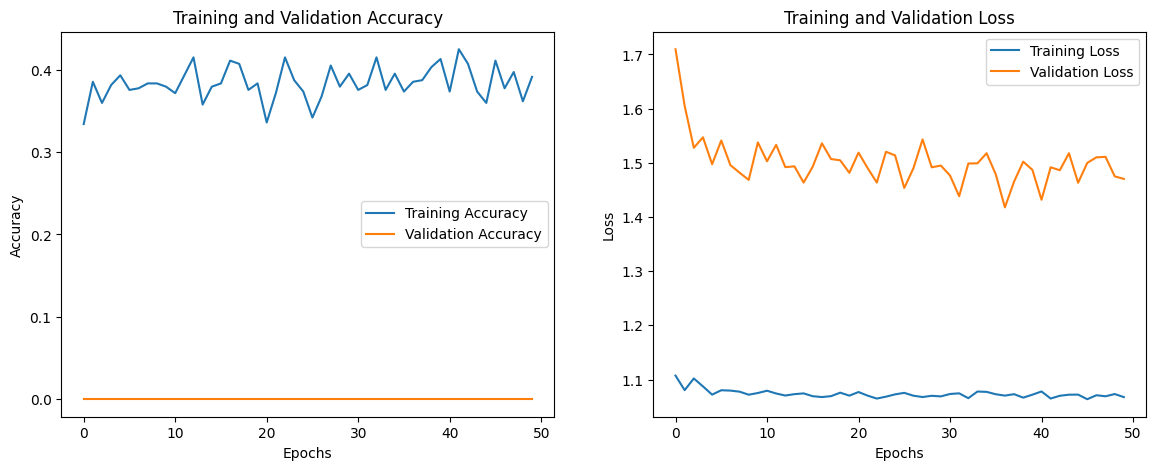

19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 940ms/step
              precision    recall  f1-score   support

 dry_cracked       0.33      1.00      0.50       198
   inflammed       0.00      0.00      0.00       198
        pale       0.00      0.00      0.00       200

    accuracy                           0.33       596
   macro avg       0.11      0.33      0.17       596
weighted avg       0.11      0.33      0.17       596



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

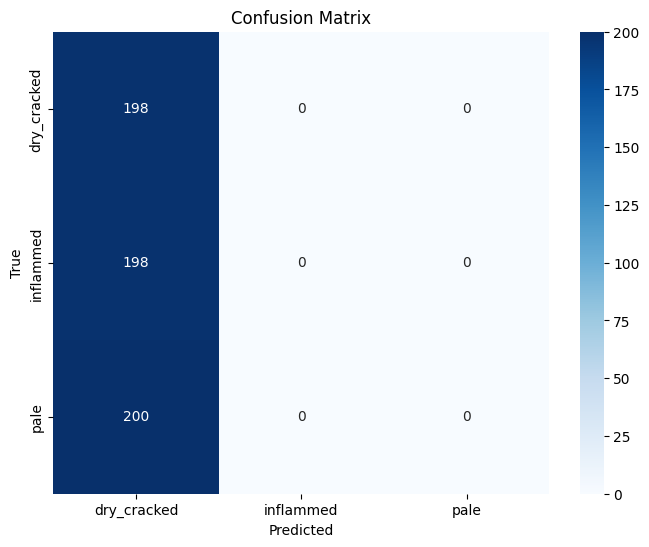

In [4]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers using GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GAP instead of Flatten
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32)

# Plot accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model
preds = np.argmax(model.predict(images), axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(labels, preds)
print(classification_report(labels, preds, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [6]:
# Save the model to a file
model.save("ann_efficient_best_model.h5")